<a href="https://colab.research.google.com/github/KyobeDerrickSteven/Heart-Disease-Prediction/blob/main/Heart_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

print('setup Complete')

setup Complete


Open file as .csv

In [14]:
file_path = '/content/drive/MyDrive/Colab Notebooks/HeartDisease_Prediction/Heart_disease/heart.csv'
data = pd.read_csv(file_path)
#print(heart_data.shape)
heart_data = data.copy(deep=True)
X = heart_data
y = heart_data['HeartDisease']

print(X.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [15]:
distribution = heart_data.HeartDisease.value_counts()
distribution

1    508
0    410
Name: HeartDisease, dtype: int64

In [16]:
col = list(X.columns)
cat_cols = []
num_cols  = []
for i in col:
    if len(X[i].unique()) < 6 and X[i].dtype =='object':
        cat_cols.append(i)
    else:
        num_cols.append(i)

print('Categorical Features :',*cat_cols)
print('Numerical Features :',*num_cols)
full_cols = cat_cols + num_cols
print(full_cols)

Categorical Features : Sex ChestPainType RestingECG ExerciseAngina ST_Slope
Numerical Features : Age RestingBP Cholesterol FastingBS MaxHR Oldpeak HeartDisease
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


<ipython-input-17-1554ddf643fa>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,i+1)
<ipython-input-17-1554ddf643fa>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,i+1)
<ipython-input-17-1554ddf643fa>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,i+1)


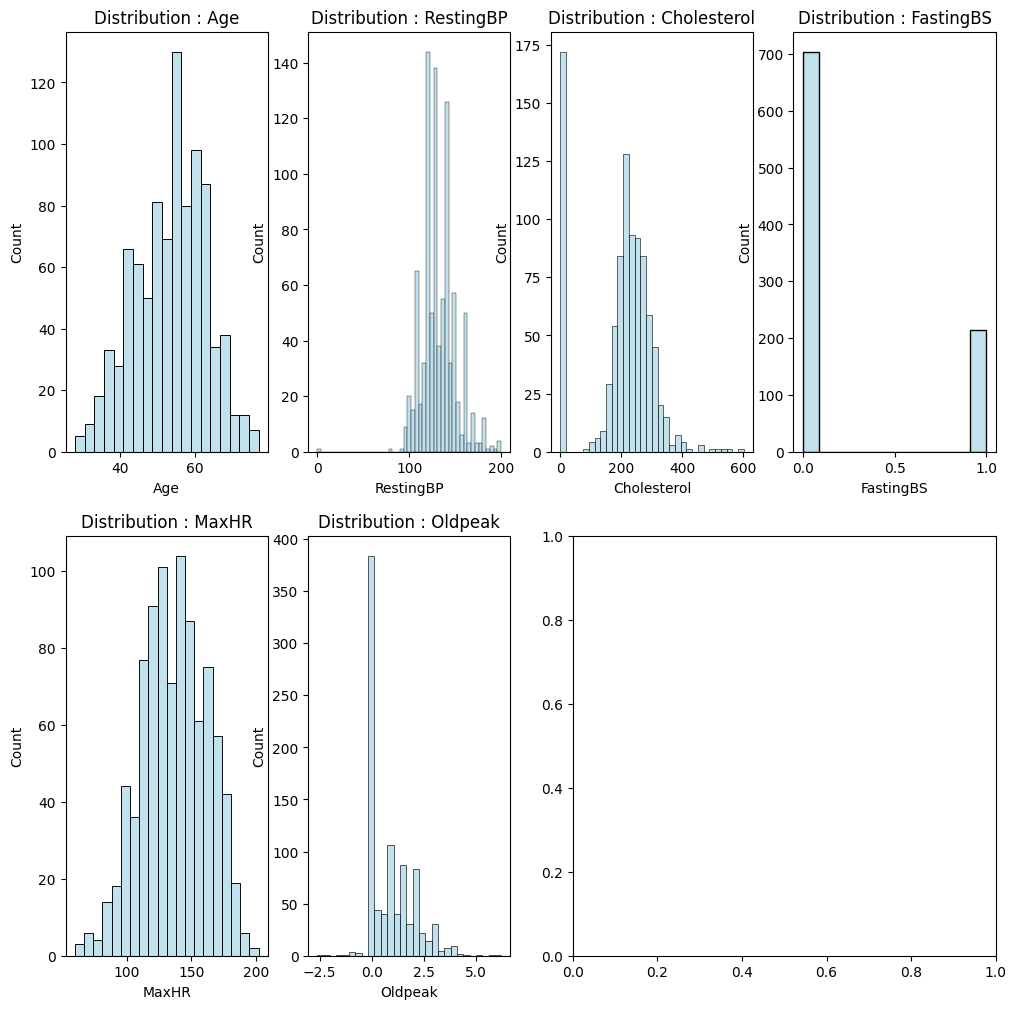

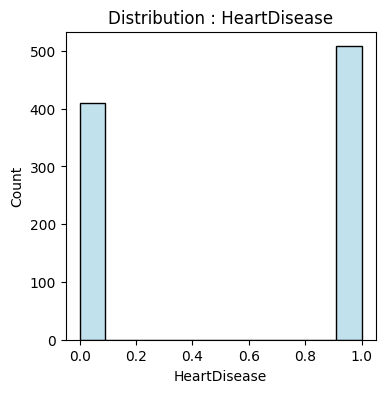

In [17]:
colors = ['lightblue', 'yellow']
print(num_cols)
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (12,12))
for i in range(len(num_cols) - 1):
  plt.subplot(2,4,i+1)
  sns.histplot(X[num_cols[i]],color = colors[0])
  title = 'Distribution : ' + num_cols[i]
  plt.title(title)
plt.show()

plt.figure(figsize = (4, 4))
sns.histplot(X[num_cols[len(num_cols) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + num_cols[len(num_cols) - 1]
plt.title(title);

**Label Encoding for Categorical labels**

Here we use a Label Encoder to deal with our categorical columns




In [18]:
#dataset = data.copy(deep = True)
lab_Encoder = LabelEncoder()

X['Sex'] = lab_Encoder.fit_transform(X['Sex'])
X['ChestPainType'] = lab_Encoder.fit_transform(X['ChestPainType'])
X['RestingECG'] = lab_Encoder.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = lab_Encoder.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = lab_Encoder.fit_transform(X['ST_Slope'])

X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<ipython-input-19-07a518695e21>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)
<ipython-input-19-07a518695e21>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)
<ipython-input-19-07a518695e21>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)
<ipython-input-19-07a518695e21>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


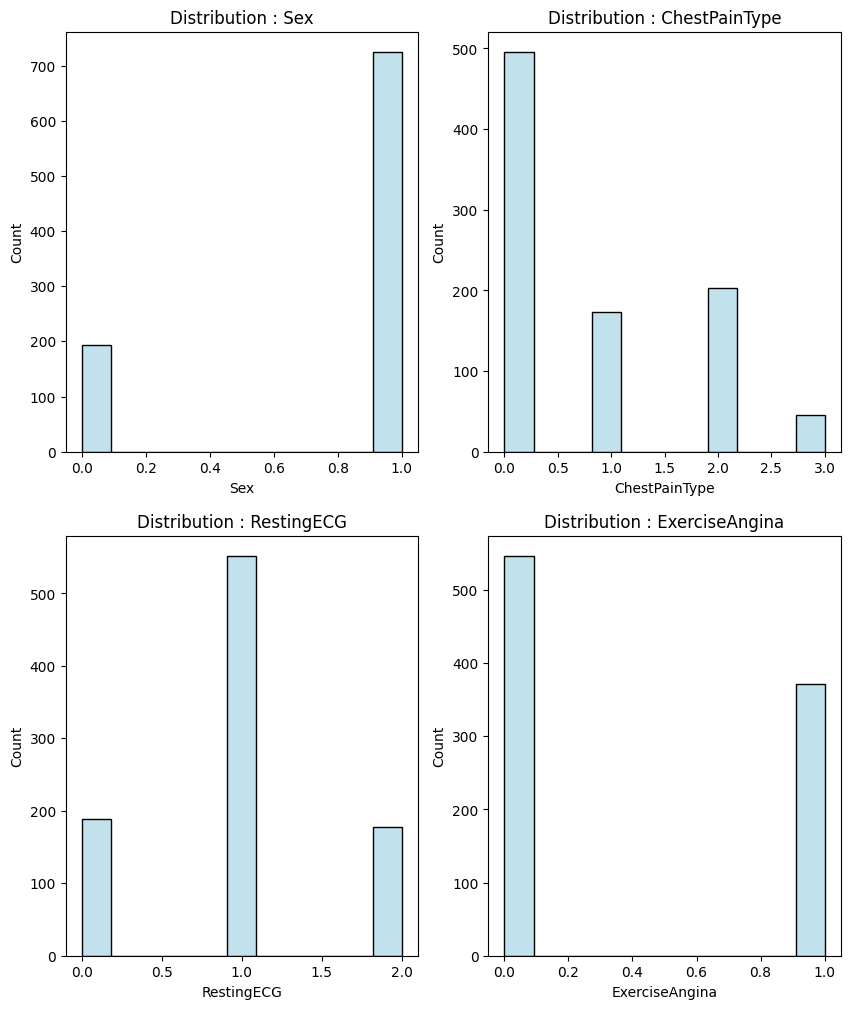

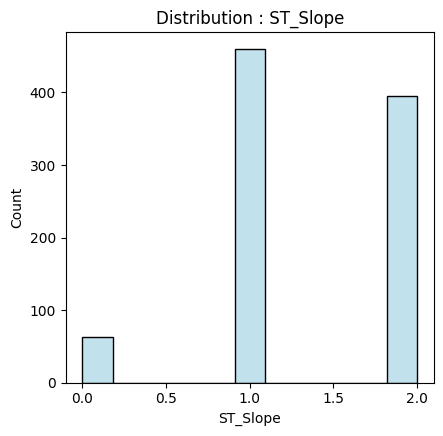

In [19]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,12))
for i in range(len(cat_cols) - 1):
  plt.subplot(2,2,i+1)
  sns.histplot(X[cat_cols[i]], kde_kws = {'bw' : 1}, color = colors[0]);
  title = 'Distribution : ' + cat_cols[i]
  plt.title(title)

plt.figure(figsize = (4.75,4.55))
sns.histplot(X[cat_cols[len(cat_cols) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + cat_cols[len(cat_cols) - 1]
plt.title(title);

**Describing the dataset**




In [20]:
X.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Datascaling of the Dataset

In [21]:
my_scaler = StandardScaler()
this_scaler = MinMaxScaler()

# Standardization
X['Age'] = my_scaler.fit_transform(X[['Age']])
X['RestingBP'] = my_scaler.fit_transform(X[['RestingBP']])
X['Cholesterol'] = my_scaler.fit_transform(X[['Cholesterol']])
X['MaxHR'] = my_scaler.fit_transform(X[['MaxHR']])

# Normalization
X['Oldpeak'] = this_scaler.fit_transform(X[['Oldpeak']])

X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,0.295455,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.409091,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.295455,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.465909,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.295455,2,0


<Axes: >

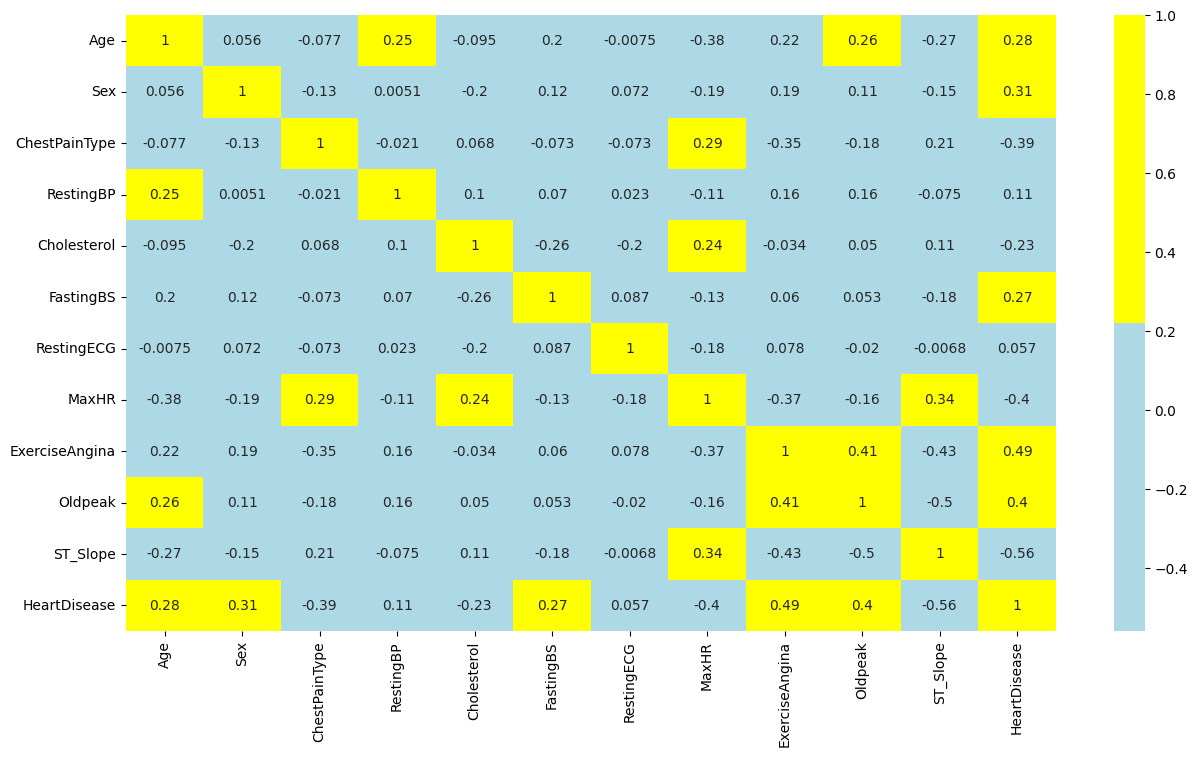

In [22]:
colors = ['lightblue', 'yellow']
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(), annot = True, cmap=colors)

**Dropping Irrelevant features**

According to the Correlations with Heart Disease, Resting ECG and RestingBP had the lowest values.

Also drop main target feature HeartDisease


In [23]:
X = X.drop(['RestingBP', 'RestingECG', 'HeartDisease'],axis = 1)
X

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,1,1,0.825070,0,1.382928,0,0.295455,2
1,-0.478484,0,2,-0.171961,0,0.754157,0,0.409091,1
2,-1.751359,1,1,0.770188,0,-1.525138,0,0.295455,2
3,-0.584556,0,0,0.139040,0,-1.132156,1,0.465909,1
4,0.051881,1,2,-0.034755,0,-0.581981,0,0.295455,2
...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,3,0.596393,0,-0.188999,0,0.431818,1
914,1.536902,1,0,-0.053049,1,0.164684,0,0.681818,1
915,0.370100,1,0,-0.620168,0,-0.857069,1,0.431818,1
916,0.370100,0,1,0.340275,0,1.461525,0,0.295455,1


Saving the Dataframe into a numpy array

In [24]:
X = X.values
y = y.values
X

array([[-1.4331398 ,  1.        ,  1.        , ...,  0.        ,
         0.29545455,  2.        ],
       [-0.47848359,  0.        ,  2.        , ...,  0.        ,
         0.40909091,  1.        ],
       [-1.75135854,  1.        ,  1.        , ...,  0.        ,
         0.29545455,  2.        ],
       ...,
       [ 0.37009972,  1.        ,  0.        , ...,  1.        ,
         0.43181818,  1.        ],
       [ 0.37009972,  0.        ,  1.        , ...,  0.        ,
         0.29545455,  1.        ],
       [-1.64528563,  1.        ,  2.        , ...,  0.        ,
         0.29545455,  2.        ]])

Partition using the data using the train_test_split method

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  stratify = y,
                                                  random_state=0)

Implementing the Bagging Classifier

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

def bagging_model(model_name):
    clf = BaggingClassifier(estimator= model_name,
                            n_estimators= 100,
                            oob_score= True,
                            max_samples = 0.8,
                            random_state=0)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_val)
    Model_Accuracy = accuracy_score(y_val, prediction)

    this_matrix = confusion_matrix(y_val, prediction)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in this_matrix.flatten()]
    labels = [f'{v1}\n{v2}' for v1 ,v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(5,3))
    sns.heatmap(this_matrix, annot=labels, fmt='', cmap='Blues')
    print(classification_report(y_val, prediction))
    print(confusion_matrix(y_val, prediction))

    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {np.mean(cv_scores):.2f}")
    print(f"Standard Deviation of CV accuracy: {np.std(cv_scores):.2f}")

    return round(Model_Accuracy*100)

In [27]:
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold

SupportVector_model = SVC(kernel = 'linear', C = 0.5)
Xgboost_model = XGBClassifier(n_estimators = 1000, max_depth = 4,
                          learning_rate = 0.005, n_jobs = 4)
Decision_model = DecisionTreeClassifier(max_depth = 4,min_samples_leaf = 1,random_state =42)
Random_model = RandomForestClassifier(max_depth=5)

estimators = [0.6, 0.7, 0.8, 0.9, 1.0]
models = [SupportVector_model, Decision_model, Random_model,Xgboost_model]
results = {}

for j in models:
  print(j)
  scores = list()
  for n in estimators:
    clf = BaggingClassifier(estimator= j,
                                n_estimators= 100,
                                oob_score= True,
                                max_samples = n,
                                )
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_val)
    Model_Accuracy = accuracy_score(y_val, prediction)
    Model_Accuracy = round(Model_Accuracy*100)
    scores.append(Model_Accuracy)
  results[j.__class__.__name__] = scores
  cv = StratifiedKFold(n_splits = 10)
  cv_scores = cross_val_score(clf, X_train, y_train, cv=cv)
  print(f"Cross-validation scores: {cv_scores}")
  print(f"Mean CV accuracy: {mean(cv_scores):.4f}")
  print(f"Standard Deviation of CV accuracy: {std(cv_scores):.4f}")

print(results)

SVC(C=0.5, kernel='linear')


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(results.values())
ax.set_xticklabels(results.keys())

XGB Classifier
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        82
           1       0.91      0.87      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

[[73  9]
 [13 89]]


KeyboardInterrupt: 

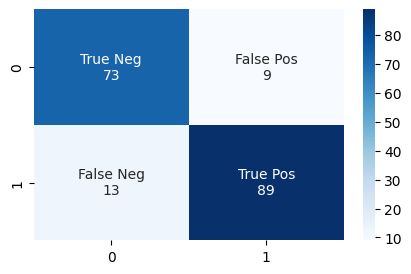

In [28]:
print('XGB Classifier')
l3_model = XGBClassifier(n_estimators = 1000, max_depth = 4,
                          learning_rate = 0.005, n_jobs = 4)
Bag_XGB = bagging_model(l3_model)
print(Bag_XGB)


SVC classifier
              precision    recall  f1-score   support

           0       0.81      0.90      0.86        82
           1       0.91      0.83      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

[[74  8]
 [17 85]]
Cross-validation scores: [0.77027027 0.81081081 0.83783784 0.83783784 0.82191781 0.83561644
 0.87671233 0.91780822 0.8630137  0.89041096 0.87837838 0.82432432
 0.90540541 0.83783784 0.82191781 0.89041096 0.80821918 0.80821918
 0.90410959 0.83561644 0.87837838 0.90540541 0.89189189 0.86486486
 0.84931507 0.84931507 0.87671233 0.76712329 0.82191781 0.83561644]
Mean CV accuracy: 0.85
Standard Deviation of CV accuracy: 0.04
86
------------------------------------------


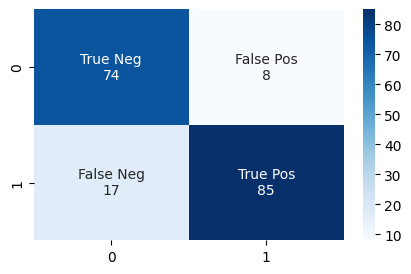

In [29]:
print('SVC classifier')
l4_model = SVC(kernel = 'linear', C = 0.5)
Bag_SVC = bagging_model(l4_model)
print(Bag_SVC)
print('------------------------------------------')

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        82
           1       0.91      0.86      0.88       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

[[73  9]
 [14 88]]
Cross-validation scores: [0.75675676 0.82432432 0.89189189 0.87837838 0.89041096 0.8630137
 0.8630137  0.91780822 0.8630137  0.84931507 0.90540541 0.85135135
 0.89189189 0.83783784 0.82191781 0.90410959 0.79452055 0.78082192
 0.90410959 0.87671233 0.90540541 0.86486486 0.87837838 0.85135135
 0.8630137  0.8630137  0.89041096 0.79452055 0.82191781 0.78082192]
Mean CV accuracy: 0.86
Standard Deviation of CV accuracy: 0.04
88
------------------------------------------


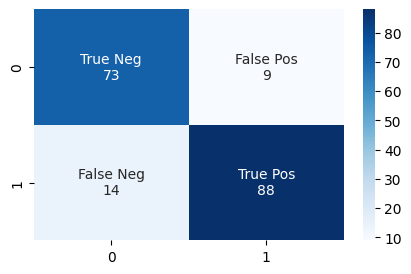

In [30]:
print('Decision Tree')
l5_model = DecisionTreeClassifier(max_depth = 4,min_samples_leaf = 1,random_state =42)
Bag_Decision = bagging_model(l5_model)
print(Bag_Decision)
print('------------------------------------------')

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        82
           1       0.91      0.88      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

[[73  9]
 [12 90]]
Cross-validation scores: [0.77027027 0.82432432 0.89189189 0.87837838 0.8630137  0.87671233
 0.89041096 0.94520548 0.84931507 0.87671233 0.91891892 0.83783784
 0.89189189 0.85135135 0.82191781 0.89041096 0.79452055 0.79452055
 0.91780822 0.8630137  0.93243243 0.86486486 0.87837838 0.86486486
 0.90410959 0.8630137  0.87671233 0.76712329 0.80821918 0.80821918]
Mean CV accuracy: 0.86
Standard Deviation of CV accuracy: 0.04
89
------------------------------------------


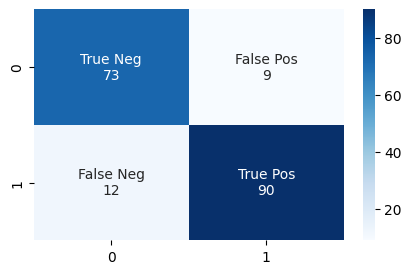

In [31]:
print('Random Forest Classifier')
l1_model = RandomForestClassifier(max_depth=5)
Bag_Random = bagging_model(l1_model)
print(Bag_Random)
print('------------------------------------------')

In [32]:
voting_reg = VotingClassifier(estimators=[('M1',l1_model),
                                          ('M3',l3_model),
                                          ('M4',l4_model),
                                          ('M5',l5_model)],
                                          voting = 'hard',
                                         #weights=[2,4,1,1]
                              )
voting_reg.fit(X_train, y_train)
vote_pred = voting_reg.predict(X_val)

print('Model score ACCURACY', voting_reg.score(X_val, y_val))

score = accuracy_score(y_val, vote_pred)
print(confusion_matrix(y_val, vote_pred))
print(classification_report(y_val, vote_pred))
print('Voting score', score)

Model score ACCURACY 0.8641304347826086
[[74  8]
 [17 85]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.86        82
           1       0.91      0.83      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

Voting score 0.8641304347826086


In [33]:
def Without_Bagging_model(Classifier):

    Classifier.fit(X_train, y_train)
    prediction = Classifier.predict(X_val)
    this_matrix = confusion_matrix(y_val, prediction)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in this_matrix.flatten()]
    labels = [f'{v1}\n{v2}' for v1 ,v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(5,3))
    sns.heatmap(this_matrix, annot=labels, fmt='', cmap='Blues')
    print(classification_report(y_val, prediction))
    print('Model Accuracy',accuracy_score(y_val, prediction))
    ans = Classifier.score(X_val, y_val)
    return ans


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        82
           1       0.91      0.86      0.88       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

Model Accuracy 0.875
0.875
------------------------------------------


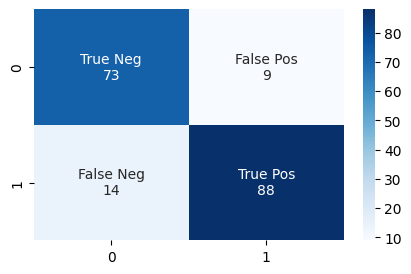

In [34]:
print('Random Forest Classifier')
RFC_model = RandomForestClassifier(max_depth=5)
Notbagged_Random = Without_Bagging_model(RFC_model)
print(Notbagged_Random)
print('------------------------------------------')

XGB Classifier
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Model Accuracy 0.8804347826086957
0.8804347826086957
------------------------------------------


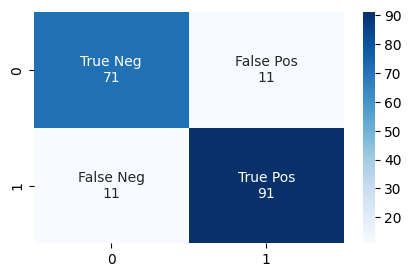

In [35]:
print('XGB Classifier')
XGB_model = XGBClassifier(n_estimators = 1000, max_depth = 4,
                          learning_rate = 0.005, n_jobs = 4)
NotBagged_XGB = Without_Bagging_model(XGB_model)
print(NotBagged_XGB)
print('------------------------------------------')

SVC classifier
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        82
           1       0.90      0.83      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Model Accuracy 0.8586956521739131
0.8586956521739131
------------------------------------------


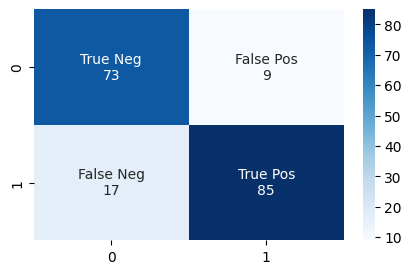

In [36]:
print('SVC classifier')
SVC_model = SVC(kernel = 'linear', C = 0.5,  probability=True)
NotBagged_SVC = Without_Bagging_model(SVC_model)
print(NotBagged_SVC)
print('------------------------------------------')

Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        82
           1       0.88      0.84      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Model Accuracy 0.8478260869565217
0.8478260869565217
------------------------------------------


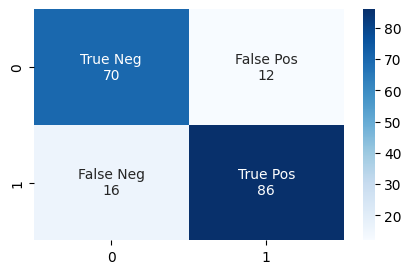

In [37]:
print('Decision Tree')
DecisionTree_model = DecisionTreeClassifier(max_depth = 4,min_samples_leaf = 1,random_state =42)
NotBagged_DecisionTree = Without_Bagging_model(DecisionTree_model)
print(NotBagged_DecisionTree)
print('------------------------------------------')

**Final Ensemble**

In [38]:
voting_reg = VotingClassifier(estimators=[('M1',BaggingClassifier(estimator= RandomForestClassifier(max_depth=5), n_estimators= 100,
                                                                   oob_score= True,  max_samples = 0.8, random_state=0)),
                                          ('M2',BaggingClassifier(estimator= XGBClassifier(n_estimators = 1000, max_depth = 4, learning_rate = 0.005, n_jobs = 4),
                                                                  n_estimators= 100, oob_score= True, max_samples = 0.8, random_state=0)),
                                          ('M3',BaggingClassifier(estimator= SVC(kernel = 'linear', C = 0.5), n_estimators= 100, oob_score= True,
                                                                   max_samples = 0.8, random_state=0)),
                                          ('M4',BaggingClassifier(estimator= DecisionTreeClassifier(max_depth = 4,min_samples_leaf = 1,random_state =42),
                                                                  n_estimators= 100, oob_score= True, max_samples = 0.8, random_state=0))],
                                          voting = 'soft' ,
                                         weights=[2,4,1,1])

voting_reg.fit(X_train, y_train)
vote_pred = voting_reg.predict(X_val)
score = accuracy_score(y_val, vote_pred)
print('Voting score', score)
print('Model score ACCURACY', voting_reg.score(X_val, y_val))
print(confusion_matrix(y_val, vote_pred))
print(classification_report(y_val, vote_pred))

Voting score 0.8913043478260869
Model score ACCURACY 0.8913043478260869
[[74  8]
 [12 90]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        82
           1       0.92      0.88      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



Voting Prediction 0.9528933524629364


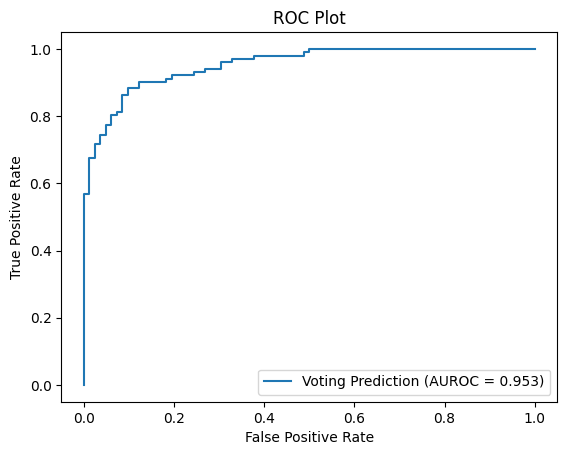

In [39]:
vote_probs = voting_reg.predict_proba(X_val)
vote_probs = vote_probs[:,1]
vote_auc = roc_auc_score(y_val, vote_probs)
r_fpr, r_tpr,_ = roc_curve(y_val, vote_probs)
print('Voting Prediction', vote_auc)

plt.plot(r_fpr, r_tpr, linestyle='-', label='Voting Prediction (AUROC = %0.3f)' % vote_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [40]:
RFC_model = RandomForestClassifier(max_depth=5)

XGBC_model = XGBClassifier(n_estimators = 1000, max_depth = 4,
                          learning_rate = 0.005, n_jobs = 4)

SVC_model = SVC(kernel = 'linear', C = 0.5, probability=True)

DTC_model = DecisionTreeClassifier(max_depth = 4,min_samples_leaf = 1,random_state =42)

Comparing Un-Bagged Individual Classifiers with the Final Bagged Ensemble

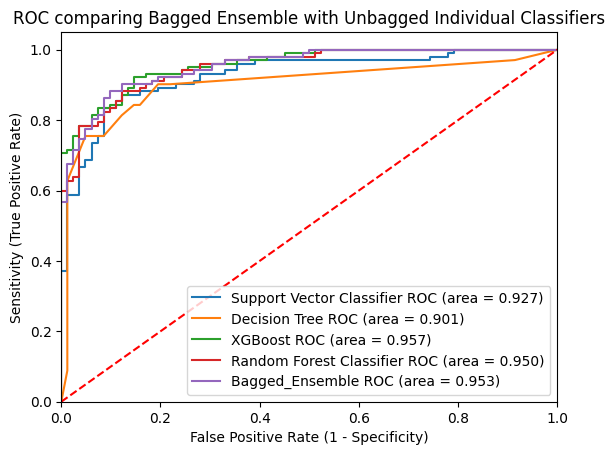

In [41]:
plt.figure()

models = [
{
    'label': 'Support Vector Classifier',
    'model': SVC_model
},
{
    'label': 'Decision Tree',
    'model': DTC_model
},
 {
     'label': 'XGBoost',
     'model': XGBC_model

},
{
    'label': 'Random Forest Classifier',
    'model': RFC_model
},
{
    'label': 'Bagged_Ensemble',
    'model': voting_reg
}]

# Below for loop iterates through your models list
for m in models:
    model = m['model']
    model.fit(X_train, y_train) # train the model
    y_pred = model.predict(X_val) # predict the test data
    new_pred =  model.predict_proba(X_val)[:,1]

# Compute False postive rate, and True positive rate
    fpr, tpr, _ = roc_curve(y_val, new_pred)
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_val, new_pred)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('ROC comparing Bagged Ensemble with Unbagged Individual Classifiers')
plt.legend(loc="lower right")
plt.show()   # Display

Comparing Bagged Classifiers with the Final Bagged Ensemble

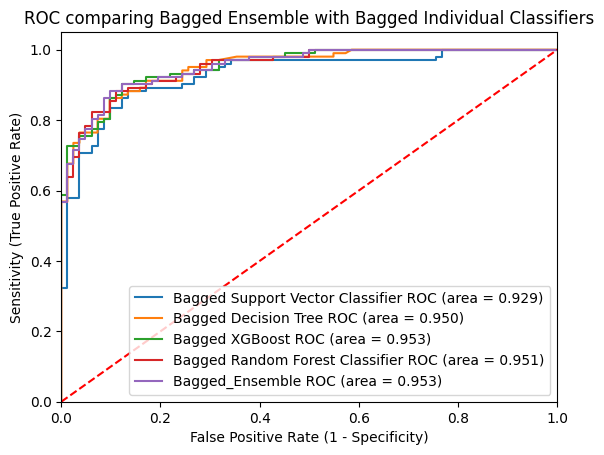

In [42]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Bagged Support Vector Classifier',
    'model':  BaggingClassifier(estimator= SVC_model,n_estimators= 100,
                  oob_score= True, max_samples = 0.8,random_state=0),
},
{
    'label': 'Bagged Decision Tree',
    'model':   BaggingClassifier(estimator= DTC_model,n_estimators= 100,
                  oob_score= True, max_samples = 0.8,random_state=0),
},
 {
     'label': 'Bagged XGBoost',
     'model':  BaggingClassifier(estimator= XGBC_model,n_estimators= 100,
                  oob_score= True, max_samples = 0.8,random_state=0)

},
{
    'label': 'Bagged Random Forest Classifier',
    'model':  BaggingClassifier(estimator= RFC_model,n_estimators= 100,
                  oob_score= True, max_samples = 0.8,random_state=0)

},
{
    'label': 'Bagged_Ensemble',
    'model': voting_reg
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model']
    model.fit(X_train, y_train) # train the model
    y_pred = model.predict(X_val) # predict the test data
    new_pred =  model.predict_proba(X_val)[:,1]

# Compute False postive rate, and True positive rate
    fpr, tpr, _ = roc_curve(y_val, new_pred)
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_val, new_pred)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('ROC comparing Bagged Ensemble with Bagged Individual Classifiers')
plt.legend(loc="lower right")
plt.show()   # Display

In [43]:
testing_pd = pd.DataFrame({'Age':'40', 'Sex':0, 'ChestPainType':0, 'Cholesterol':'289','FastingBS':0, 'MaxHR':172, 'ExerciseAngina':'1', 'Oldpeak':'0.0', 'ST_Slope':'2'} ,index=[0])
print(testing_pd)
new_pred = voting_reg.predict(testing_pd)
new_pred

  Age  Sex  ChestPainType Cholesterol  FastingBS  MaxHR ExerciseAngina  \
0  40    0              0         289          0    172              1   

  Oldpeak ST_Slope  
0     0.0        2  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


array([0])

<Axes: >

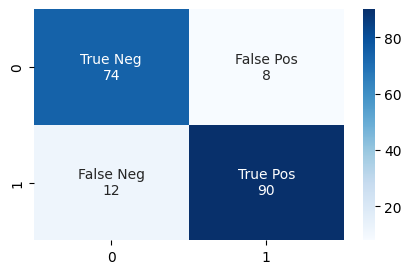

In [44]:
clf_matrix = confusion_matrix(y_val, vote_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in clf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1 ,v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(5,3))
sns.heatmap(clf_matrix, annot=labels, fmt='', cmap='Blues')

Saving the Ensemble model as Pickle

In [ ]:
# Saving the desired model
with open('/content/drive/MyDrive/Colab_Notebooks/HeartDisease_Prediction/Heart_disease/Heart_Disease.pkl', 'wb') as file:
  pickle.dump(voting_reg, file)

In [ ]:
# Opening the desired model
with open('Heart_Disease.pkl', 'rb') as file:
 pk_model =  pickle.load(file)

pk_pred = pk_model.predict([[40, 0, 0, 289,0,172, 1,0.0,2]])
print("The result is",pk_pred) # Printing result